In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

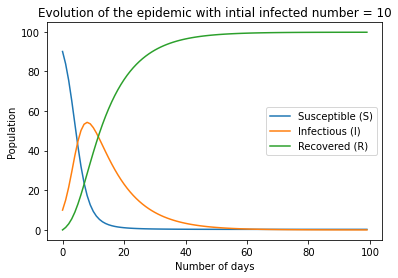

In [15]:
beta=0.58
gamma=1/10

def SIRK4(i0,N,nbjours):

    dt = 1
    S=np.zeros(nbjours)
    I=np.zeros(nbjours)
    R=np.zeros(nbjours)

    I[0]=i0
    S[0]=N-i0
    R[0]=0
    
    for i in range(nbjours - 1):
        
        #k1
        k1_S = (-beta * S[i] * I[i]) / N * dt
        k1_I = ((beta * S[i] * I[i]) / N - gamma * I[i] ) * dt
        k1_R = gamma * I[i] * dt
        
        S_k1 = S[i] + k1_S
        I_k1 = I[i] + k1_I
        R_k1 = R[i] + k1_R
        
        #k2
        S_k2 = S[i] + 0.5 * k1_S
        I_k2 = I[i] + 0.5 * k1_I
        R_k2 = R[i] + 0.5 * k1_R
        
        k2_S = (-beta * S_k2 * I_k2) / N * dt
        k2_I = ((beta * S_k2 * I_k2) / N - gamma * I_k2 ) * dt
        k2_R = gamma * I_k2 * dt
        
        #k3
        S_k3 = S[i] + 0.5 * k2_S
        I_k3 = I[i] + 0.5 * k2_I
        R_k3 = R[i] + 0.5 * k2_R
        
        k3_S = (-beta * S_k3 * I_k3) / N * dt
        k3_I = ((beta * S_k3 * I_k3) / N - gamma * I_k3 ) * dt
        k3_R = gamma * I_k3 * dt
        
        #k4
        S_k4 = S[i] + k3_S
        I_k4 = I[i] + k3_I
        R_k4 = R[i] + k3_R
        
        k4_S = (-beta * S_k4 * I_k4) / N * dt
        k4_I = ((beta * S_k4 * I_k4) / N - gamma * I_k4 ) * dt
        k4_R = gamma * I_k4 * dt
        
        #finding n+1
        S[i+1] = S[i] + (k1_S + 2*k2_S + 2*k3_S + k4_S) / 6
        I[i+1] = I[i] + (k1_I + 2*k2_I + 2*k3_I + k4_I) / 6
        R[i+1] = R[i] + (k1_R + 2*k2_R + 2*k3_R + k4_R) / 6

    return S, I, R

N = 100
i0 = 10
nbjours = 100

S,I,R=SIRK4(i0, N, nbjours)
plt.plot(S,label="Susceptible (S)")
plt.plot(I,label="Infectious (I)")
plt.plot(R,label="Recovered (R)")
plt.xlabel("Number of days")
plt.ylabel("Population")
plt.title(f"Evolution of the epidemic with intial infected number = 10")
plt.legend()
plt.show()